### Case Study 4 :  Data Science Shark Tank:  Pitch Your Ideas

** Due Date: April 27, 6pm**
<img src="https://cp.inkrefuge.com/images%5Cpressreleases/shark%20tank_large.jpg" width="400px"> 

After the previous 3 case studies,  your team has now equipped with all the three powerful skills of data science: Hacking skill, Business skill and Math skill. In this project, your team is going to make use of these skills to come up with an idea of a new business/startup based upon data science technology. Your goal is to design a better service/solution on any data you like, develop a prototype/demo and prepare a pitch for your idea.
* Your team needs to decide which business problem is important for the market you are joining in (for example, social media market, housing market, search market, etc.).
* Then design a data science approach to improve one of the current services or design a new service on any data that you choose.
* The solution should include all the three components of data science: 1) the business part to analyze the potential impact of your new/improved service, why the idea can make money, how much are you evaluating the company; How are you planing to persuade the sharks to invest in your business; 2) the mathematical part to formulate the problem and develop math solution; 3) the programming part to collect the data, implement the math solution, and develop the prototype/demo.


# Background about Elevator Pitch (90 seconds) and Shark Tank

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("mrSmaCo29U4") 

In [2]:
YouTubeVideo("xIq8Sg59UdY") 

### Two videos on storytelling

https://video.wpi.edu/Watch/g2T4NjBn

https://video.wpi.edu/Watch/q2A6Dbg3


**Optional Readings:** 
* LinkedIn API: https://developer.linkedin.com/docs/rest-api
* Zillow API: https://pypi.python.org/pypi/pyzillow
* Google Map API: https://developers.google.com/api-client-library/python/apis/mapsengine/v1?hl=en
* More APIs: https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition


** Python libraries you may want to use:**
* Scikit-learn (http://scikit-learn.org): machine learning tools in Python.

** Data sources:**
* UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/ 
* Statlib datasets: http://lib.stat.cmu.edu/
* Kaggel: www.kaggle.com 
* Open Gov. Data: www.data.gov, www.data.gov.uk, www.data.gov.fr, http://opengovernmentdata.org/data/catalogues/   

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

### Global Imports

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Save .csv file into Pandas Data Frame & HDF5 (Hierarchical Data Format)

In [78]:
csv_path = 'OnlineNewsPopularity.csv'
hdf_path = 'online_news_popularity.h5'

# Read .csv file into data frame
data_frame = pd.read_csv(csv_path, sep=', ', engine='python')

# Rename *channel* columns
data_frame.rename(columns={
        'data_channel_is_lifestyle': 'is_lifestyle',
        'data_channel_is_entertainment': 'is_entertainment',
        'data_channel_is_bus': 'is_business',
        'data_channel_is_socmed': 'is_social_media',
        'data_channel_is_tech': 'is_tech',
        'data_channel_is_world': 'is_world',
    }, inplace=True)

# Rename *weekday* columns
data_frame.rename(columns={
        'weekday_is_monday': 'is_monday',
        'weekday_is_tuesday': 'is_tuesday',
        'weekday_is_wednesday': 'is_wednesday',
        'weekday_is_thursday': 'is_thursday',
        'weekday_is_friday': 'is_friday',
        'weekday_is_saturday': 'is_saturday',
        'weekday_is_sunday': 'is_sunday',
    }, inplace=True)

# Store data into HDF5 file
data_hdf = pd.HDFStore(hdf_path)
data_hdf['data_frame'] = data_frame
data_hdf.close()

### Read HDF5 file into Pandas Data Frame

In [79]:
# Read .h5 file into data frame
data_frame = pd.read_hdf(hdf_path)

# Print data frame column headers
# print list(data_frame) # Shortest way
list(data_frame.columns.values) # Easy-to-read output

['url',
 'timedelta',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'is_lifestyle',
 'is_entertainment',
 'is_business',
 'is_social_media',
 'is_tech',
 'is_world',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'is_monday',
 'is_tuesday',
 'is_wednesday',
 'is_thursday',
 'is_friday',
 'is_saturday',
 'is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_negative_words',
 'avg_positive_polarity',
 'min_positive_polarity',
 'max_positive_polarity',
 'avg_negative_polarit

### A brief exploration

In [80]:
data_frame.shape

(39644, 61)

In [81]:
#remove outliers if applicable 
data_frame2=data_frame[np.abs(data_frame.shares-data_frame.shares.mean())<=(2*data_frame.shares.std())] #keep only the ones that are within +2 to -2 standard deviations in the column 'Data'.
data_frame2

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1,0.815385,4,2,1,...,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1,0.791946,3,1,1,...,0.033333,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1,0.663866,3,1,1,...,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1,0.665635,9,0,1,...,0.136364,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1,0.540890,19,19,20,...,0.033333,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731,10,370,0.559889,1,0.698198,2,2,0,...,0.136364,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731,8,960,0.418163,1,0.549834,21,20,20,...,0.100000,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731,12,989,0.433574,1,0.572108,20,20,20,...,0.100000,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731,11,97,0.670103,1,0.836735,2,0,0,...,0.400000,0.800000,-0.125000,-0.125000,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731,10,231,0.636364,1,0.797101,4,1,1,...,0.100000,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.000000,0.500000,0.000000,710


In [25]:
data_frame2.shape

(39130, 61)

In [26]:
# Summary statistics for shares and number of words in the title
data_frame2[['shares','n_tokens_title', 'n_tokens_content', 'n_unique_tokens']].describe()

,shares,n_tokens_title,n_tokens_content,n_unique_tokens
count,39130.000000,39130.000000,39130.000000,39130.000000
mean,2604.414925,10.394505,546.975824,0.548304
std,3356.840372,2.112438,470.309240,3.543710
min,1.000000,2.000000,0.000000,0.000000
25%,941.000000,9.000000,247.000000,0.470777
50%,1400.000000,10.000000,410.000000,0.538987
75%,2700.000000,12.000000,716.750000,0.608209
max,26600.000000,23.000000,8474.000000,701.000000


{'boxes': [<matplotlib.lines.Line2D at 0xb24f588>],
 'caps': [<matplotlib.lines.Line2D at 0x11b02208>,
 'fliers': [<matplotlib.lines.Line2D at 0x11b122b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11b02cf8>],
 'whiskers': [<matplotlib.lines.Line2D at 0xb24f668>,
  <matplotlib.lines.Line2D at 0xb24fc50>]}

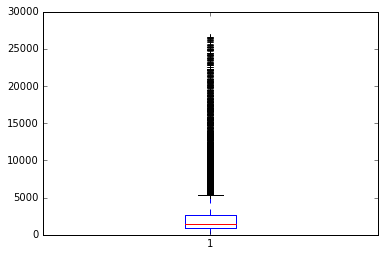

In [27]:
import plotly.plotly as py

plt.boxplot(data_frame2['shares'])

In [31]:
# avg number of words in tiel and avg number of words in the content for popular articules(shares more than 1400)
data_popular= data_frame2.ix[data_frame2['shares'] >= 1400]
data_popular[['shares','n_tokens_title', 'n_tokens_content','n_unique_tokens']].describe()

,shares,n_tokens_title,n_tokens_content,n_unique_tokens
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,4122.785853,10.301550,566.091957,0.557952
std,4052.960447,2.120151,507.147459,4.877742
min,1400.000000,2.000000,0.000000,0.000000
25%,1800.000000,9.000000,246.000000,0.462785
50%,2600.000000,10.000000,414.000000,0.534566
75%,4600.000000,12.000000,747.000000,0.606147
max,26600.000000,23.000000,8474.000000,701.000000


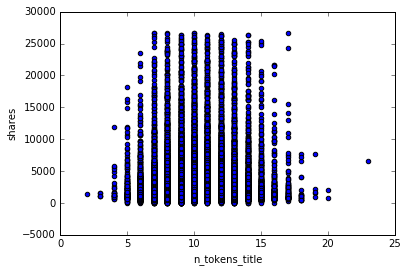

In [32]:
#explore the relationship with some features and the number of shares
data_frame2.plot(kind='scatter', x='n_tokens_title', y='shares')

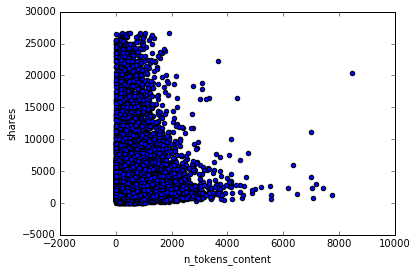

In [33]:
data_frame2.plot(kind='scatter', x='n_tokens_content', y='shares')

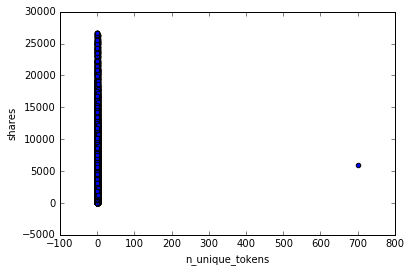

In [34]:
data_frame2.plot(kind='scatter', x='n_unique_tokens', y='shares')

                                                                                   mean
is_lifestyle is_entertainment is_business is_social_media is_tech is_world             
0            0                0           0               0       0         3749.458263
                                                                  1         1936.390614
                                                          1       0         2723.536512
                                          1               0       0         3239.659713
                              1           0               0       0         2259.911319
             1                0           0               0       0         2292.752441
1            0                0           0               0       0         2987.393340


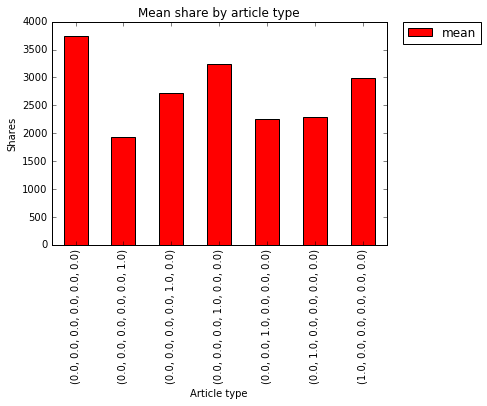

In [35]:
# Mean shares for each type of Article
type_articles = data_frame2.pivot_table('shares', index=['is_lifestyle', 'is_entertainment', 'is_business', 'is_social_media', 'is_tech', 'is_world'], aggfunc=[np.mean])
print type_articles

type_articles.plot(kind='bar', color='red')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Mean share by article type')
plt.xlabel('Article type')
plt.ylabel('Shares')


From the result above, looks like lifestyle and social media shares relatively more

                                                                           mean
is_monday is_tuesday is_wednesday is_thursday is_friday is_weekend             
0         0          0            0           0         1           3191.187842
                                              1         0           2598.227176
                                  1           0         0           2483.523186
                     1            0           0         0           2456.536891
          1          0            0           0         0           2482.604903
1         0          0            0           0         0           2585.619985


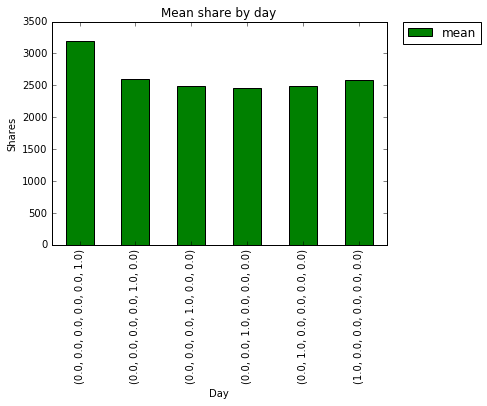

In [36]:
#on avg, which day shares more 
day_articles = data_frame2.pivot_table('shares', index=['is_monday', 'is_tuesday', 'is_wednesday', 'is_thursday', 'is_friday', 'is_weekend'], aggfunc=[np.mean])
print day_articles

day_articles.plot(kind='bar', color='green')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Mean share by day')
plt.xlabel('Day')
plt.ylabel('Shares')


From the result above, it shows weekend and Monday shares relatively more


In [37]:
# Mean shares for tech and not tech channels during and not during weekends
data_frame2.pivot_table('shares', index=['is_weekend'], columns=['is_tech'], aggfunc=[np.mean], margins=True)

mean                          
is_tech             0.0          1.0          All
is_weekend                                       
0.0         2492.308759  2619.384085  2516.159199
1.0         3134.770769  3450.213115  3191.187842
All         2577.099777  2723.536512  2604.414925

                                                                mean
is_monday is_tuesday is_wednesday is_thursday is_friday             
0         0          0            0           0          3450.213115
                                              1          2661.075510
                                  1           0          2533.807368
                     1            0           0          2647.878465
          1          0            0           0          2647.338787
1         0          0            0           0          2610.865526


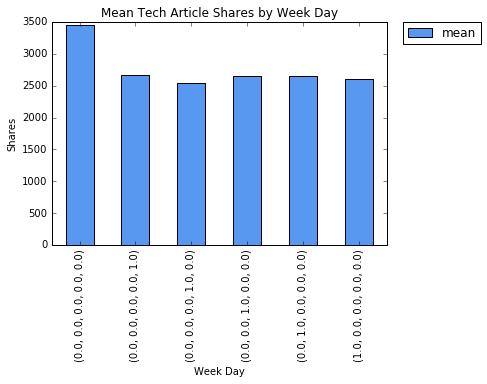

In [38]:
tech_articles = data_frame2.ix[data_frame2['is_tech'] == 1]
tech_articles = tech_articles.pivot_table('shares', index=['is_monday', 'is_tuesday', 'is_wednesday', 'is_thursday', 'is_friday'], aggfunc=[np.mean])
print tech_articles

tech_articles.plot(kind='bar', color=['#5898f1'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Mean Tech Article Shares by Week Day')
plt.xlabel('Week Day')
plt.ylabel('Shares')


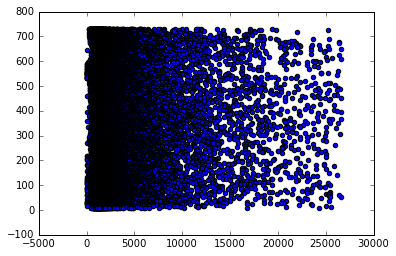

In [39]:
plt.scatter(data_frame2['shares'], data_frame2['timedelta'])

Added 'buzz_factor' column: "Buzz-Factor" (using shares/day)

In [40]:
buzz_factor=data_frame2['shares']/data_frame2['timedelta']

Added one 'popularity' column: split # of shares into 4 "popularity" bins:

percentile 0-25%-- "Unpopular"
percentile 25%-50%-- "Mildly Popular"
Percentile 50%-75%--"Popular"
Percentile 75%-100%-- "Very Popular"


In [41]:
popularity=pd.qcut(data_frame2['shares'], 4,  labels=["Unpopular","Midly Popular","Popular","Very Popular"])
#popularity=pd.qcut(data_frame2['shares'], 4,  labels=[1,3,6,10])

In [42]:
df=data_frame2
df['buzz_factor']=buzz_factor.values
df['popularity']=popularity.values
df.shape

C:\Users\Eric\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Eric\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



(39130, 63)

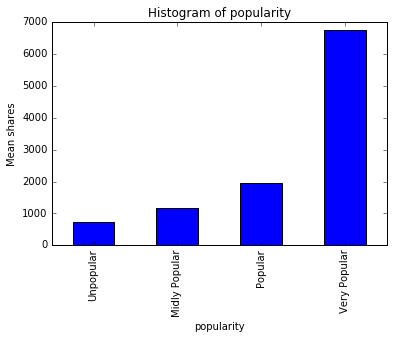

In [43]:
df_popularity=df.pivot_table('shares',index='popularity',aggfunc='mean')

df_popularity.plot(kind='bar')
plt.title('Histogram of popularity')
plt.ylabel('Mean shares')

In [91]:
#try to detect clusters

from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=4, random_state=1)
good_columns = data_frame2._get_numeric_data()
kmeans_model.fit(good_columns)
labels = kmeans_model.labels_

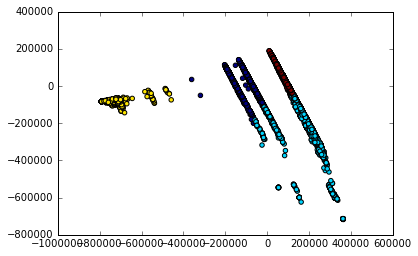

In [92]:
from sklearn.decomposition import PCA
pca = PCA(2)
plot_columns = pca.fit_transform(good_columns)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()

### Problem 1: the Business Part (20 points)
 As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on.
Pick one of the markets for further consideration, and design a new service  which you believe to be important in the market. 
Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve.
Why the problem is important to solve? 
Why you believe you could make a big difference with data science technology.
How are you planing to persuade the investors to buy in your idea.

**Please describe here *briefly*  (please edit this cell)**

1) Your business problem to solve:



2) Why the problem is important to solve? 


3) What is your idea to solve the problem? 


4) What differences you could make with your data science approach?


5) Why do you believe the idea deserves the investment of the "sharks"?






### Problem 2: The Math Part (20 points)

Define the business problem as a math problem and design a math solution to the problem.


**Insert your answers here**


1) Problem formulation in Math:




2) Math Solution:






3) Implementation of the Solution


In [44]:
#Finding correlations
df.corr()['shares'].order(ascending=False)

C:\Users\Eric\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:2: FutureWarning:

order is deprecated, use sort_values(...)



shares                          1.000000
buzz_factor                     0.409006
kw_avg_avg                      0.184027
LDA_03                          0.122997
kw_max_avg                      0.096294
kw_min_avg                      0.081258
num_hrefs                       0.076651
num_imgs                        0.073403
self_reference_avg_sharess      0.067889
is_weekend                      0.067792
self_reference_min_shares       0.060230
self_reference_max_shares       0.055830
kw_avg_max                      0.052563
global_subjectivity             0.052508
abs_title_sentiment_polarity    0.052128
is_sunday                       0.049506
title_subjectivity              0.048917
is_social_media                 0.047302
num_keywords                    0.044302
is_saturday                     0.042820
title_sentiment_polarity        0.037470
num_videos                      0.036995
kw_avg_min                      0.036717
kw_max_min                      0.033022
is_lifestyle    

In [45]:
X=df
del X['shares']


In [46]:
features=list(X.columns[2:61])

In [47]:
features

['n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'is_lifestyle',
 'is_entertainment',
 'is_business',
 'is_social_media',
 'is_tech',
 'is_world',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'is_monday',
 'is_tuesday',
 'is_wednesday',
 'is_thursday',
 'is_friday',
 'is_saturday',
 'is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_negative_words',
 'avg_positive_polarity',
 'min_positive_polarity',
 'max_positive_polarity',
 'avg_negative_polarity',
 'min_negative_pol

In [52]:

from sklearn import preprocessing 
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA 
from sklearn.svm import SVC
import pandas as pd
from sklearn import metrics
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.lda import LDA
from sklearn.qda import QDA
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC

In [53]:
#feature importance
feature_selection_model = ExtraTreesClassifier().fit(X[features], X['popularity'])
feature_importance=feature_selection_model.feature_importances_
importance_matrix=np.array([features,list(feature_importance)]).T
def sortkey(s):
    return s[1]
sort=zip(features,list(feature_importance))
f=pd.DataFrame(sorted(sort,key=sortkey,reverse=True),columns=['variables','importance'])[:10]
f

,variables,importance
0,buzz_factor,0.084965
1,kw_avg_avg,0.023781
2,LDA_02,0.023238
3,kw_min_avg,0.022668
4,kw_avg_max,0.022016
5,kw_max_avg,0.021969
6,LDA_00,0.021615
7,LDA_04,0.021368
8,LDA_03,0.021318
9,LDA_01,0.021128


In [54]:
features2=f['variables']

In [55]:
#split data into two parts
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(X[features2], X.popularity, test_size=0.4, random_state=None)
x_train.shape

(23478, 10)

In [56]:
from sklearn import cross_validation, metrics
from sklearn.naive_bayes import BernoulliNB
from time import time

In [57]:
# Decision Tree accuracy and time elapsed caculation
t0=time()
print "DecisionTree"
dt = DecisionTreeClassifier(min_samples_split=25,random_state=1)
clf_dt=dt.fit(x_train,y_train)
y_predicted = clf_dt.predict(x_test)
print(metrics.classification_report(y_test, y_predicted))
t1=time()
print "time elapsed: ", t1-t0

DecisionTree
             precision    recall  f1-score   support

Midly Popular       0.56      0.56      0.56      4181
    Popular       0.55      0.57      0.56      3816
  Unpopular       0.73      0.68      0.70      3907
Very Popular       0.69      0.72      0.70      3748

avg / total       0.63      0.63      0.63     15652

time elapsed:  0.587000131607


In [58]:
# cross validation for DT
tt0=time()
print "cross result========"
scores = cross_validation.cross_val_score(dt, X[features], X.popularity, cv=30)
print scores
print scores.mean()
tt1=time()
print "time elapsed: ", tt1-tt0
print "\n"

cross result========
[ 0.91424196  0.9517611   0.91500766  0.91340996  0.91187739  0.94022989
  0.90881226  0.8835249   0.84137931  0.85210728  0.88122605  0.82988506
  0.6835249   0.52873563  0.62452107  0.63831418  0.62835249  0.56168582
  0.52453988  0.48773006  0.5053681   0.4654908   0.47392638  0.47392638
  0.47198772  0.42780338  0.50460829  0.43087558  0.33717358  0.33026114]
0.661409606953
time elapsed:  76.8989999294




In [59]:
# Random Forest accuracy and time elapsed caculation
t2=time()
print "RandomForest"
rf = RandomForestClassifier(n_estimators=100,n_jobs=1)
clf_rf = rf.fit(x_train,y_train)
print "Acurracy: ", clf_rf.score(x_test,y_test)
t3=time()
print "time elapsed: ", t3-t2

RandomForest
Acurracy:  0.673140812676
time elapsed:  12.9049999714


In [49]:
#cross validation for RF
tt2=time()
print "cross result========"
scores = cross_validation.cross_val_score(rf, df[features2], df['popularity'], cv=50)
print scores
print scores.mean()
tt3=time()
print "time elapsed: ", tt3-tt2
print "\n"


cross result========
[ 0.87672956  0.91069182  0.95088161  0.88790932  0.85012594  0.79974811
  0.78967254  0.73803526  0.74559194  0.73551637  0.74307305  0.73929471
  0.74685139  0.74433249  0.71284635  0.76700252  0.77581864  0.74559194
  0.72166247  0.70277078  0.69395466  0.64609572  0.63602015  0.6372796
  0.61964736  0.58690176  0.57178841  0.56801008  0.57556675  0.58312343
  0.56439394  0.54166667  0.54740834  0.5676359   0.51959545  0.51201011
  0.49051833  0.49304678  0.50442478  0.4437421   0.46017699  0.43994943
  0.40834387  0.42098609  0.43489254  0.39570164  0.37926675  0.36409608
  0.32364096  0.26295828]
0.617539795545
time elapsed:  1490.4460001




In [60]:
# bagging tree 
bg=BaggingClassifier()
clf_bg=bg.fit(x_train,y_train)
print "Acurracy: ", clf_bg.score(x_test,y_test)


Acurracy:  0.669115767953


In [93]:
#cross validation for bagging
print "cross result========"
scores = cross_validation.cross_val_score(bg, X[features2], X['popularity'], cv=50)
print scores
print scores.mean()


cross result========
[ 0.93207547  0.99245283  0.98992443  0.88664987  0.82997481  0.77078086
  0.73299748  0.69521411  0.70277078  0.73173804  0.72292191  0.72166247
  0.72040302  0.73929471  0.73929471  0.74055416  0.77455919  0.74433249
  0.67128463  0.63602015  0.63853904  0.56171285  0.55919395  0.53274559
  0.56926952  0.59949622  0.5768262   0.54911839  0.55793451  0.61964736
  0.63510101  0.53787879  0.51074589  0.55499368  0.59924147  0.53476612
  0.52465234  0.5335019   0.53223767  0.56384324  0.58027813  0.49178255
  0.5448799   0.52085967  0.54361568  0.49557522  0.40834387  0.4045512
  0.39823009  0.29329962]
0.628955355818


In [68]:
# support vector classifier 
print 'LinearSVC'
svc=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)
clf_svc=svc.fit(x_train,y_train)
print "Acurracy: ", clf_svc.score(x_test,y_test)

LinearSVC
[LibLinear]Acurracy:  0.474444160491


In [61]:
#KNN accuracy and time elapsed caculation
t6=time()
print "KNN"
from sklearn.neighbors.nearest_centroid import NearestCentroid
knn=NearestCentroid()
clf_knn=knn.fit(x_train, y_train)
print "Acurracy: ", clf_knn.score(x_test,y_test)
metrics.classification_report
t7=time()
print "time elapsed: ", t7-t6


KNN
Acurracy:  0.254280603118
time elapsed:  0.0320000648499


In [83]:
# cross validation for KNN
tt6=time()
print "cross result========"
scores = cross_validation.cross_val_score(knn, X[features2], X['popularity'], cv=50)
print scores
print scores.mean()
tt7=time()
print "time elapsed: ", tt7-tt6
print "\n"

cross result========
[ 0.25031447  0.25031447  0.25062972  0.25566751  0.22921914  0.21662469
  0.27078086  0.29848866  0.25440806  0.25062972  0.27455919  0.22921914
  0.30100756  0.27078086  0.24937028  0.28211587  0.26448363  0.25440806
  0.27329975  0.29093199  0.30478589  0.25944584  0.26700252  0.26196474
  0.26826196  0.28337531  0.302267    0.26448363  0.27455919  0.26196474
  0.22979798  0.27020202  0.2528445   0.23261694  0.26675095  0.24652339
  0.27939317  0.26801517  0.26295828  0.27686473  0.25410872  0.26675095
  0.26675095  0.25410872  0.2920354   0.26548673  0.26169406  0.27433628
  0.26042984  0.27180784]
0.264376821181
time elapsed:  4.23000001907




In [62]:
# Naive Bayes accuracy and time elapsed caculation
t4=time()
print "NaiveBayes"
nb = BernoulliNB()
clf_nb=nb.fit(x_train,y_train)
print "Acurracy: ", clf_nb.score(x_test,y_test)
t5=time()
print "time elapsed: ", t5-t4


NaiveBayes
Acurracy:  0.266227958088
time elapsed:  0.069000005722


In [85]:
# cross-validation for NB
tt4=time()
print "cross result========"
scores = cross_validation.cross_val_score(nb, X[features2], X['popularity'], cv=5)
print scores
print scores.mean()
tt5=time()
print "time elapsed: ", tt5-tt4
print "\n"


cross result========
[ 0.2591425   0.26885246  0.25655903  0.2632442   0.25731584]
0.261022805502
time elapsed:  0.609999895096




In [63]:
# LDA 
lda_fitted=LDA().fit(x_train,y_train).predict(x_test)
print(metrics.classification_report(lda_fitted, y_test))


             precision    recall  f1-score   support

Midly Popular       0.19      0.31      0.23      2524
    Popular       0.36      0.31      0.33      4545
  Unpopular       0.56      0.38      0.45      5802
Very Popular       0.41      0.55      0.47      2781

avg / total       0.42      0.38      0.39     15652



C:\Users\Eric\AppData\Local\Enthought\Canopy\User\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning:

Variables are collinear.



In [64]:
#QDA
QDA_fitted=QDA().fit(x_train,y_train).predict(x_test)
qda_matrix=metrics.classification_report(y_pred=QDA_fitted,y_true=y_test)
print qda_matrix


             precision    recall  f1-score   support

Midly Popular       0.28      0.52      0.36      4181
    Popular       0.25      0.08      0.12      3816
  Unpopular       0.38      0.41      0.39      3907
Very Popular       0.52      0.34      0.41      3748

avg / total       0.36      0.34      0.32     15652



C:\Users\Eric\AppData\Local\Enthought\Canopy\User\lib\site-packages\sklearn\discriminant_analysis.py:688: UserWarning:

Variables are collinear



### Problem 3: The Hacking Part  (20 points)


* Data Collection
* Implement a small Demo/Prototype/experiment result figures for the "product" of your data science company. You could use this demo during the Pitch

In [94]:
#try to predict buzz_factor to see if it is better
train = df.sample(frac=0.6, random_state=1)
test = df.loc[~df.index.isin(train.index)]
print(train.shape)
print(test.shape)

(23478, 62)
(15652, 62)


In [95]:
features=list(df.columns[2:60])

In [99]:
#linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit(train[features], train['buzz_factor'])
from sklearn.metrics import mean_squared_error
predictions = model.predict(test[features])
mean_squared_error(predictions, test['buzz_factor'])

2149.5226594376181

In [100]:
# Import the random forest model.
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=60, min_samples_leaf=10, random_state=1)
model2.fit(train[features], train['buzz_factor'])
predictions = model2.predict(test[features])
mean_squared_error(predictions, test['buzz_factor'])

2006.7999229542322

*------------------------

### Problem 4: Prepare a 90 second Pitch and *present* it in the class (20 points)

* Prepare the slide(s) for the Pitch (10 points)
* Present it in the class (10 points).

*Advice:  It should really only be one or two slides, but a really good one or two slides!  Also, it is ok to select one person on the team to give the 90 second pitch (though a very organized multi-person 90 second pitch can be very impressive!) *



# Report: communicate the results (20 points)

(1) (5 points) What is your business proposition?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) How does your analysis support your business proposition?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: **NOTE, for this Case Study you need to prepare two (2) PPT files!**  One for the 90 second Pitch and one for a normal 10 minute presentation.

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.

     (please include figures or tables in the report, but no source code)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Send an email to rcpaffenroth@wpi.edu with the subject: "[DS501] Case study 4".